<h1>Can Machine Learning Algorithms Use Low-Cost Clinical Data to Effectively Predict the Onset of Heart Disease?
</h1>
<h2 style="color:Sea Green">Siddharth Tiwari and Rishitha Boddu</h2>
<h4>Quarter 3 Project</h4><br>

<h3>Purpose</h3>
<p>Heart Disease is one of the most costly and devastating diseases in the world, causing around 655,000 deaths per year in the United States. For this reason, it is essential for clinicians to actively screen for the risk of heart disease, especially early before its development. Although methods of screening (i.e. Blood Tests, Electrocardiography, Fluoroscopy) are available to most people, individuals may be deterred from screening due to the high cost of some screening methods. For this reason, we implement a personally-developed machine learning algorithm that uses low-cost parameters to predict the onset of heart disease. Our goal in this project is to determine if machine learning methods effectively predict the onset of heart disease with low-cost metrics.</p><br>

Dataset from: <a href="https://www.kaggle.com/johnsmith88/heart-disease-dataset" target="_blank">https://www.kaggle.com/johnsmith88/heart-disease-dataset</a>
<br/>
Originally retreived from: 
<a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease" target="_blank">https://archive.ics.uci.edu/ml/datasets/Heart+Disease</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

#load dataset and display
heart_df = pd.read_csv("heart.csv")

<h2 style="color:#E07A5F">Describe Dataset</h2>

<h4>Description from David Lapp (Publisher of the Dataset)</h4>
<p><i>"This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V."</i></p>

<h4>Parameters available:</h4>
<table>
    <tr>
        <th>Metric Name</th>
        <th>Metric Name (In Dataset)</th>
        <th>Metric Summary</th>
    </tr>
    <tr>
        <td>Age</td>
        <td>"age"</td>
        <td>Age of patient</td>
    </tr>
    <tr>
        <td>Sex</td>
        <td>"sex"</td>
        <td>Sex of patient - male or female</td>
    </tr>
    <tr>
        <td>Chest Pain (4 Values)</td>
        <td>"cp"</td>
        <td>Chest pain type (typical angina, atypical angina, non-angina, or asymptomatic angina) represented by numbers 1-4 or 0 if inapplicable </td>
    </tr>
    <tr>
        <td>Resting Blood Pressure</td>
        <td>"restbps"</td>
        <td>Resting blood pressure (mm Hg). Calculated using a sphygmomanometer (consists of stethoscope, arm cuff, pump, and dial)</td>
    </tr>
    <tr>
        <td>Serum Cholestorol (mg/dl)</td>
        <td>"chol"</td>
        <td>Serum cholesterol (mg/dl) measured in a blood test called a lipid profile/panel - show levels of high and low-density lipoprotein cholesterol and amount of triglycerides in blood</td>
    </tr>
    <tr>
        <td>Fasting Blood Pressure (greater than 120 mg/dl)</td>
        <td>"fbs"</td>
        <td>Blood test taken after a period of fasting (generally eight hours). Value is either greater than or less that 120 mg/dl (>120 indicates diagnosis of diabetes)</td>
    </tr>
    <tr>
        <td>Resting Electrocardiographic (ECG) Results (3 Values)</td>
        <td>"restecg"</td>
        <td>Resting electrocardiography results (normal, ST-T wave abnormality, or left ventricular hypertrophy)</td>
    </tr>
    <tr>
        <td>Maximum Heart Rate</td>
        <td>"thalach"</td>
        <td>Max heart rate = 220 - age</td>
    </tr>
    <tr>
        <td>Exercise-Induced Angina</td>
        <td>"exang"</td>
        <td>Is angina (chest pain which occurs when heart does not receive enough oxygen-rich blood) caused by exercise?</td>
    </tr>
    <tr>
        <td>Intercept of ST Segment (during exercise)</td>
        <td>"oldpeak"</td>
        <td>ST depression induced by exercise relative to rest. ST depression is a finding on an electrocardiogram graph</td>
    </tr>
    <tr>
        <td>Slope of ST Segment (during exercise)</td>
        <td>"slope"</td>
        <td>Slope of peak exercise ST segment (upsloping, flat, or downsloping)</td>
    </tr>
    <tr>
        <td>Major Vessels Colored by Flouroscopy</td>
        <td>"ca"</td>
        <td>Number of major vessels colored by fluoroscopy, a test which uses a beam of x-rays to look at parts and movement of parts of the body</td>
    </tr>
    <tr>
        <td>Thalessemia</td>
        <td>"thal"</td>
        <td>Thallium stress test result (normal, fixed defect, or reversible defect) - measured through a blood test and analyzed in a lab</td>
    </tr>
    <tr>
        <td>Target</td>
        <td>"target"</td>
        <td>Precense or absence of heart disease in patient</td>
    </tr>
</table><br>

<p>Although all of these metrics correlate strongly with heart disease, some require extensive amounts of money, and in this project, we look to predict these parameters using regression and classification algorithms. We call these parameters <b>Target Parameters</b> or <b>Target Params</b>. These Target Parameters are: <b>chol, fbs, restecg, exang, oldpeak, slope, ca, thal</b>. Consequently, the remaning parameters, which we call <b>Basic Parameters</b>, are: <b>age, sex, cp, restbps, thalach.</b></p><br>

<p>In our machine learning method, we use the Basic Parameters to predict values for the Target Parameters. By predicting these Target Parameters, we can use both sets of parameters, Basic and Target, to predict the development of heart disease.</p>

In [2]:
#display dataset
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#shape of dataset
heart_df.shape

(1025, 14)

<h3> Data Visualization: Seeing the Distribution of our Data </h3>
<p> We have included a few charts to help show the distribution of data. In the pie chart, we see that 51% of our dataset is made up of patients who suffer from heart disease.</p> 
<p> We have also included a histogram to show the ages of the individuals sorted into ranges. This will help see what age group our conclusions are most relevant or accurate to. In the histogram, we see that the age range overall covers only adults as there are no kids or teens included. This may be because kids are not legally old enough to provide information for studies like this or for a more medical reason. We cannot assume anything. However, with the information we do have, it can be seen that individuals who are or are close to 60 years of age are the most common age group in our data.</p>
<p>Finally, we have another simple pie chart that shows the split in sex. This will show how many people in the data are female vs male. </p>

<AxesSubplot:title={'center':'Heart Disease Present?'}, ylabel='target'>

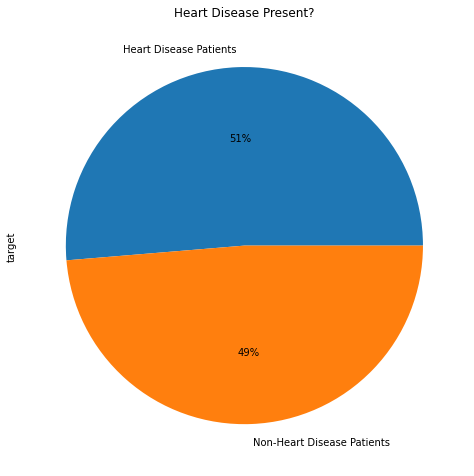

In [4]:
# data visualization - pie chart of distribution between heart disease patients and non patients
plt.rcParams["figure.figsize"] = [8,10]
labels = 'Heart Disease Patients', 'Non-Heart Disease Patients'
heart_df.target.value_counts().plot(kind='pie', title = "Heart Disease Present?", labels = labels, autopct='%1.0f%%')

(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

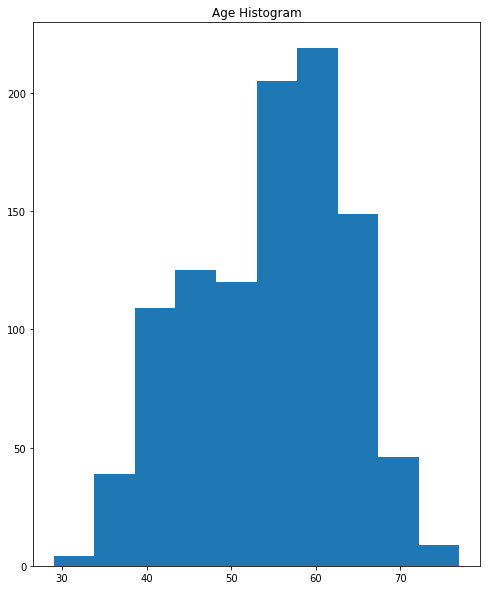

In [5]:
# data visualization - see the distribution of ages (in ranges) of our data
import matplotlib.pyplot as plt
import numpy as np
import math

plt.title('Age Histogram')
plt.hist(heart_df['age'])

<AxesSubplot:title={'center':'Amount of Males vs Females in Our Data'}, ylabel='sex'>

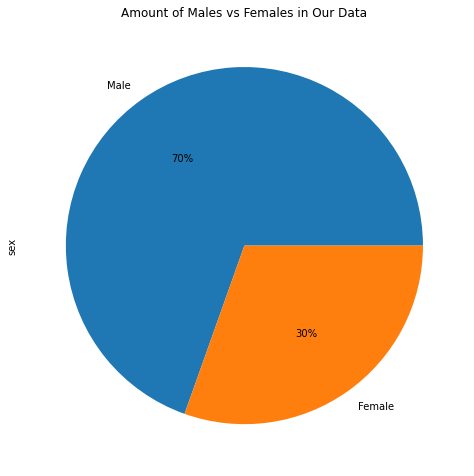

In [6]:
# data visualization - how many females vs males do we have?
# 1 = male, 0 = female
plt.rcParams["figure.figsize"] = [8,10]
labels = 'Male', 'Female'
heart_df.sex.value_counts().plot(kind='pie', title = "Amount of Males vs Females in Our Data", labels = labels, autopct='%1.0f%%')

In [7]:
#specifying test sets
X = heart_df.drop(['target'], axis = 1)
y = heart_df['target']

<h1 style="color:#08A4BD">======================================================</h1><br><br>

<h2 style="color:#E07A5F">Baseline Classifications</h2>

<p>We perform two classifications to compare the accuracy of classifications using all the parameters (WITH TARGET PARAMETERS) and classifications excluding the Target Parameters. By performing these classifications, we can compare the results of the baseline classification algorithms with the final classification algorithm.</p>

In [8]:
# Control Classifications

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

In [9]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
classifier = log_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Logistic Regression Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

Logistic Regression Reports:
[[157  32]
 [ 20 201]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       189
           1       0.86      0.91      0.89       221

    accuracy                           0.87       410
   macro avg       0.87      0.87      0.87       410
weighted avg       0.87      0.87      0.87       410

0.8731707317073171


SVM Reports:
[[181   8]
 [ 17 204]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       189
           1       0.96      0.92      0.94       221

    accuracy                           0.94       410
   macro avg       0.94      0.94      0.94       410
weighted avg       0.94      0.94      0.94       410

0.9390243902439024


KNN Reports:
[[158  31]
 [ 30 191]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       189
           1       0.86      0.86      0.86       221

    accuracy    

In [10]:
# Experimental Classifications

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['target']

In [11]:
#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

In [12]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
classifier = log_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Logistic Regression Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

Logistic Regression Reports:
[[154  35]
 [ 47 174]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       189
           1       0.83      0.79      0.81       221

    accuracy                           0.80       410
   macro avg       0.80      0.80      0.80       410
weighted avg       0.80      0.80      0.80       410

0.8


SVM Reports:
[[164  25]
 [ 52 169]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       189
           1       0.87      0.76      0.81       221

    accuracy                           0.81       410
   macro avg       0.82      0.82      0.81       410
weighted avg       0.82      0.81      0.81       410

0.8121951219512196


KNN Reports:
[[162  27]
 [ 47 174]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       189
           1       0.87      0.79      0.82       221

    accuracy                   

<h3 style="color:Sea Green">Baseline Classification Results</h3>
<h4>Accuracy scores for baseline classifications.</h4>
<table>
    <tr>
        <th>Classifier</th>
        <th>Accuracy Score (With Target Params)</th>
        <th>Accuracy Score (Without Target Params)</th>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>0.873</td>
        <td>0.80</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.939</td>
        <td>0.812</td>
    </tr>
    <tr>
        <td><i>k-</i>NearestNeighbors</td>
        <td>0.851</td>
        <td>0.819</td>
    </tr>
</table><br>

<p>A stark difference emerges between the two algorithms by including or excluding the Target Params. We use the classifications that exclude Target Params as the baseline for our final classification algorithm.</p>

<h1 style="color:#08A4BD">======================================================</h1><br><br>

<h2 style="color:#E07A5F">Regressions/Classifications of Parameters</h2>

<p>Here, we perform different classifications or regressions depending on the type of parameter. The algorithms with the highest accuracy will be implemented in the final algorithm.</p>

<h4>Target Parameter Classifications/Regressions</h4>

In [13]:
#chol

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['chol']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)


from sklearn import svm
svm_reg = svm.SVR()
regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("SVM Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")


from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)
print("Random Forest Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")



from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=4)
regressor = knn_reg.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("KNN Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")

SVM Reports:
Root Mean Squared 49.07917733926613


Random Forest Reports:
Root Mean Squared 49.07917733926613


KNN Reports:
Root Mean Squared 37.69630933930904




In [14]:
#fbs

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['fbs']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
classifier = rf_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("Random Forest Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

SVM Reports:
[[346   0]
 [ 64   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       346
           1       0.00      0.00      0.00        64

    accuracy                           0.84       410
   macro avg       0.42      0.50      0.46       410
weighted avg       0.71      0.84      0.77       410

0.8439024390243902




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Reports:
[[346   0]
 [  6  58]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       346
           1       1.00      0.91      0.95        64

    accuracy                           0.99       410
   macro avg       0.99      0.95      0.97       410
weighted avg       0.99      0.99      0.99       410

0.9853658536585366


KNN Reports:
[[342   4]
 [ 59   5]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       346
           1       0.56      0.08      0.14        64

    accuracy                           0.85       410
   macro avg       0.70      0.53      0.53       410
weighted avg       0.81      0.85      0.79       410

0.8463414634146341




In [15]:
#restecg

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['restecg']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
classifier = rf_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("Random Forest Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

SVM Reports:
[[121  58   0]
 [100 126   0]
 [  3   2   0]]
              precision    recall  f1-score   support

           0       0.54      0.68      0.60       179
           1       0.68      0.56      0.61       226
           2       0.00      0.00      0.00         5

    accuracy                           0.60       410
   macro avg       0.41      0.41      0.40       410
weighted avg       0.61      0.60      0.60       410

0.6024390243902439




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Reports:
[[170   9   0]
 [ 13 213   0]
 [  0   0   5]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       179
           1       0.96      0.94      0.95       226
           2       1.00      1.00      1.00         5

    accuracy                           0.95       410
   macro avg       0.96      0.96      0.96       410
weighted avg       0.95      0.95      0.95       410

0.9463414634146341


KNN Reports:
[[133  45   1]
 [100 126   0]
 [  3   2   0]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64       179
           1       0.73      0.56      0.63       226
           2       0.00      0.00      0.00         5

    accuracy                           0.63       410
   macro avg       0.43      0.43      0.42       410
weighted avg       0.65      0.63      0.63       410

0.6317073170731707




In [16]:
#exang

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['exang']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
classifier = rf_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("Random Forest Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

SVM Reports:
[[242  24]
 [ 51  93]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       266
           1       0.79      0.65      0.71       144

    accuracy                           0.82       410
   macro avg       0.81      0.78      0.79       410
weighted avg       0.82      0.82      0.81       410

0.8170731707317073


Random Forest Reports:
[[266   0]
 [ 12 132]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       266
           1       1.00      0.92      0.96       144

    accuracy                           0.97       410
   macro avg       0.98      0.96      0.97       410
weighted avg       0.97      0.97      0.97       410

0.9707317073170731


KNN Reports:
[[228  38]
 [ 60  84]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       266
           1       0.69      0.58      0.63       144

    accuracy          

In [17]:
#oldpeak

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['oldpeak']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

from sklearn import svm
svm_reg = svm.SVR()
regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("SVM Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")



from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)
print("Random Forest Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")



from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=6)
regressor = knn_reg.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("KNN Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")

SVM Reports:
Root Mean Squared 1.0372559662717435


Random Forest Reports:
Root Mean Squared 1.0372559662717435


KNN Reports:
Root Mean Squared 0.9204817137596236




In [18]:
#slope

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['slope']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

from sklearn import svm
svm_reg = svm.SVR()
regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("SVM Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")


from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)
print("Random Forest Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")



from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=6)
regressor = knn_reg.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("KNN Reports:")
print('Root Mean Squared', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("")
print("")

SVM Reports:
Root Mean Squared 0.5502044346512335


Random Forest Reports:
Root Mean Squared 0.5502044346512335


KNN Reports:
Root Mean Squared 0.5097291910794225




In [19]:
#ca

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['ca']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
classifier = rf_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("Random Forest Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

SVM Reports:
[[219   7   8   0   0]
 [ 57  36   3   0   0]
 [ 25  13   8   0   0]
 [ 13   8   4   3   0]
 [  6   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       234
           1       0.56      0.38      0.45        96
           2       0.35      0.17      0.23        46
           3       1.00      0.11      0.19        28
           4       0.00      0.00      0.00         6

    accuracy                           0.65       410
   macro avg       0.52      0.32      0.33       410
weighted avg       0.63      0.65      0.60       410

0.6487804878048781




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Reports:
[[224   7   0   3   0]
 [  6  90   0   0   0]
 [  0   0  46   0   0]
 [  0   0   0  28   0]
 [  0   0   0   0   6]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       234
           1       0.93      0.94      0.93        96
           2       1.00      1.00      1.00        46
           3       0.90      1.00      0.95        28
           4       1.00      1.00      1.00         6

    accuracy                           0.96       410
   macro avg       0.96      0.98      0.97       410
weighted avg       0.96      0.96      0.96       410

0.9609756097560975


KNN Reports:
[[209  16   7   1   1]
 [ 48  40   7   1   0]
 [ 23   7  16   0   0]
 [ 11   6   6   5   0]
 [  6   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       234
           1       0.58      0.42      0.48        96
           2       0.44      0.35      0.39        46
     

In [20]:
#thal

#specifying test sets
X_1 = X.drop(['chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df['thal']

#setting train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
classifier = rf_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("Random Forest Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")



#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

SVM Reports:
[[  0   0   1   2]
 [  0   1   5  19]
 [  0   0 184  35]
 [  0   0  32 131]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.04      0.08        25
           2       0.83      0.84      0.83       219
           3       0.70      0.80      0.75       163

    accuracy                           0.77       410
   macro avg       0.63      0.42      0.41       410
weighted avg       0.78      0.77      0.75       410

0.7707317073170732




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Reports:
[[  3   0   0   0]
 [  0  22   3   0]
 [  0   0 213   6]
 [  0   0   3 160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.88      0.94        25
           2       0.97      0.97      0.97       219
           3       0.96      0.98      0.97       163

    accuracy                           0.97       410
   macro avg       0.98      0.96      0.97       410
weighted avg       0.97      0.97      0.97       410

0.9707317073170731


KNN Reports:
[[  0   0   1   2]
 [  0   6   7  12]
 [  0   2 183  34]
 [  0   1  43 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.24      0.35        25
           2       0.78      0.84      0.81       219
           3       0.71      0.73      0.72       163

    accuracy                           0.75       410
   macro avg       0.54     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3 style="color:Sea Green">Target Paramater Regression/Classification Results</h3>
<h4>Root Mean Square Errors for Target Parameter Regressions.</h4>
<table>
    <tr>
        <th>Target Parameter</th>
        <th>SVM Regression</th>
        <th>Random Forest Regression</th>
        <th>KNN Regression</th>
    </tr>
    <tr>
        <td>chol</td>
        <td>49.08</td>
        <td>49.08</td>
        <td>37.70</td>
    </tr>
    <tr>
        <td>oldpeak</td>
        <td>1.04</td>
        <td>1.04</td>
        <td>0.95</td>
    </tr>
    <tr>
        <td>slope</td>
        <td>0.55</td>
        <td>0.55</td>
        <td>0.51</td>
    </tr>
</table>

<h4>Accuracy scores for Target Parameter Classifications.</h4>
<table>
    <tr>
        <th>Target Parameter</th>
        <th>SVM Classification</th>
        <th>Random Forest Classification</th>
        <th>KNN Classification</th>
    </tr>
    <tr>
        <td>fbs</td>
        <td>0.844</td>
        <td>0.985</td>
        <td>0.846</td>
    </tr>
    <tr>
        <td>restecg</td>
        <td>0.602</td>
        <td>0.946</td>
        <td>0.631</td>
    </tr>
    <tr>
        <td>exang</td>
        <td>0.817</td>
        <td>0.971</td>
        <td>0.760</td>
    </tr>
    <tr>
        <td>ca</td>
        <td>0.649</td>
        <td>0.961</td>
        <td>0.659</td>
    </tr>
    <tr>
        <td>thal</td>
        <td>0.771</td>
        <td>0.971</td>
        <td>0.751</td>
    </tr>
</table>

<h1 style="color:#08A4BD">======================================================</h1><br><br>

<h2 style="color:#E07A5F">Final Classifications</h2>

<p>We use the predictions the previous regressions/classifications for the target parameters (chol, fbs, restecg, exang, oldpeak, slope, ca, thal) in a final classification algorithm. In this final classification algorithm, we use the algorithms with the highest accuracy (lowest root mean square error for regressions/highest accuracy score for classifications).</p>

In [22]:
#list with all target params
target_params = ['chol', 'oldpeak','slope', 'fbs','restecg','exang','ca','thal']

#dictionary to store predictions for target params
predictors = {"chol":[],
             "oldpeak":[],
             "slope":[],
             "fbs":[],
             "restecg":[],
             "exang":[],
             "ca":[],
             "thal":[]}

#specifying sets
X_1 = heart_df.drop(['target','chol', 'restecg', 'exang', 'thal','oldpeak','slope','fbs','ca'], axis = 1)
y = heart_df[target_params + ['target']]

#dividing into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_all = sc.transform(X_1)

#run regressions/classifications and store into dictionary
for i in range(len(target_params)):
    if(i<3):
        knn_reg = KNeighborsRegressor(n_neighbors=5)
        regressor = knn_reg.fit(X_train,y_train[target_params[i]])
        predictors[target_params[i]] = regressor.predict(X_all)
        
    else:
        rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
        classifier = rf_clf.fit(X_train, y_train[target_params[i]])
        predictors[target_params[i]] = classifier.predict(X_all)
    

# convert dictionary to dataframe
X_2 = pd.DataFrame.from_dict(predictors)


#FINAL CLASSIFICATION METHOD (Using basic parameters and target parameters to determine 'target')

#specifying sets
X = pd.concat([X_1, X_2], axis=1)
y = heart_df['target']

#dividing data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

#scaling data
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)


#using Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
classifier = log_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Logistic Regression Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

#using SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("SVM Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")


#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#printing reports
print("KNN Reports:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("")
print("")

Logistic Regression Reports:
[[155  34]
 [ 26 195]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       189
           1       0.85      0.88      0.87       221

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410

0.8536585365853658


SVM Reports:
[[176  13]
 [ 28 193]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       189
           1       0.94      0.87      0.90       221

    accuracy                           0.90       410
   macro avg       0.90      0.90      0.90       410
weighted avg       0.90      0.90      0.90       410

0.9


KNN Reports:
[[161  28]
 [ 34 187]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       189
           1       0.87      0.85      0.86       221

    accuracy                   

<h3 style="color:Sea Green">Final Classification Results</h3>
<h4>Accuracy scores for all classifications.</h4>
<table>
    <tr>
        <th>Classifier</th>
        <th>Accuracy Score (Including Target Params)</th>
        <th>Accuracy Score (Excluding Target Params)</th>
        <th>Accuracy Score (Including <i>Predicted</i> Target Params)</th>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>0.873</td>
        <td>0.80</td>
        <td>0.854</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.939</td>
        <td>0.812</td>
        <td>0.9</td>
    </tr>
    <tr>
        <td><i>k-</i>NearestNeighbors</td>
        <td>0.851</td>
        <td>0.819</td>
        <td>0.849</td>
    </tr>
</table>

<h1 style="color:#08A4BD">======================================================</h1>

<h1>Conclusion</h1>

<p>By classifying or regression high-cost screening results (target parameters) using low-cost, readily available metrics (basic parameters), we can increase the accuracy of predictions substantially. Although other algorithms may be better suited for these data (classify the data more accurately/practically), our use of a simple combination of regressions and classification algorithms show that it is possible to use five metrics to predict results with relative accuracy. Hopefully, through further exploration of these data and implementation of more complex, extensive algorithms, clinicans can use simple clinical data to screen for the possibility of heart disease.</p>